# Support Vector Regression

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [112]:
data = pd.read_csv("Data\Position_Salaries_1.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Splitting dependent and independent variables

In [113]:
y = data.iloc[:, 2].values
x = data.iloc[:, 1:2].values

## Feature Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [116]:
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [117]:
y = y[:, 0]

## Fitting SVR to the dataset

In [118]:
from sklearn.svm import SVR

In [119]:
svr_regressor = SVR(kernel="rbf")

In [120]:
svr_regressor.fit(x, y)

SVR()

In [121]:
y_pred = svr_regressor.predict(scaler_x.transform(np.array([[6.5]])))
scaler_y.inverse_transform(y_pred.reshape(-1, 1))

array([[170370.0204065]])

## Plotting the prediction

In [122]:
x = scaler_x.inverse_transform(x)
y = scaler_y.inverse_transform(y.reshape(-1, 1))

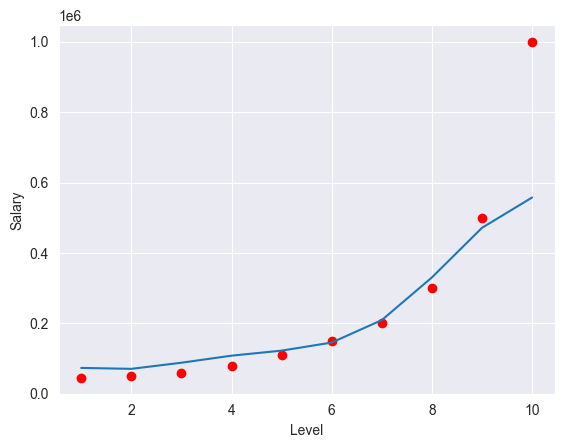

In [128]:
plt.scatter(x=x, y=y, color="red")
plt.plot(x, scaler_y.inverse_transform(svr_regressor.predict(scaler_x.transform(
    x)).reshape(-1, 1)))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Here CEO is considered as 'outlier'